In [5]:
# gradient descent
# 
import numpy as np
import random
import matplotlib.pyplot as plt

$$ e= (y- \hat{y})**2$$
$$ \hat{y} = Xb$$
$$ e= (y- Xb)**2$$
$$ \frac{de}{db}= 2(y- Xb)(-X)$$

In [2]:
# grad_desc (X,y) --> b ----> b*X=y. Nerde yapıyoruz. Mesela 10binli bir matris var.
# bunun tersini alarak çözmek çok zorlu ve uzun bir süreç.
# grad_desc ile çabucak çözülebilir.

In [3]:
def grad_desc(X,y,tol=10**-6, lr=0.01,max_iter=10000 , normalize= False):
    if normalize:
        X= X/y
        y=y/y
    iter_=0
    b= random.random()
    print( "B sayısı= " ,b)
    grad = 10
    old_grad=20
    while (abs(grad)> tol) & (iter_< max_iter):
        grad= 2*(y-X*b)*(-X)
        if abs(grad)> abs(old_grad):
            print("grad uzaklaşıyor")
            break
        b=b - lr * grad  # lr= learning rate
        # b katsayısınına ulaşmak istiyorum. bu kapsamda b'den öğrenme oranı*türevi çıkarıyorum ki. 
        # katsayıya ulaşabileyim.
        iter_ +=1
        old_grad= grad
        
    print("grad= " ,grad)
    print("iter= ", iter_)
    return b

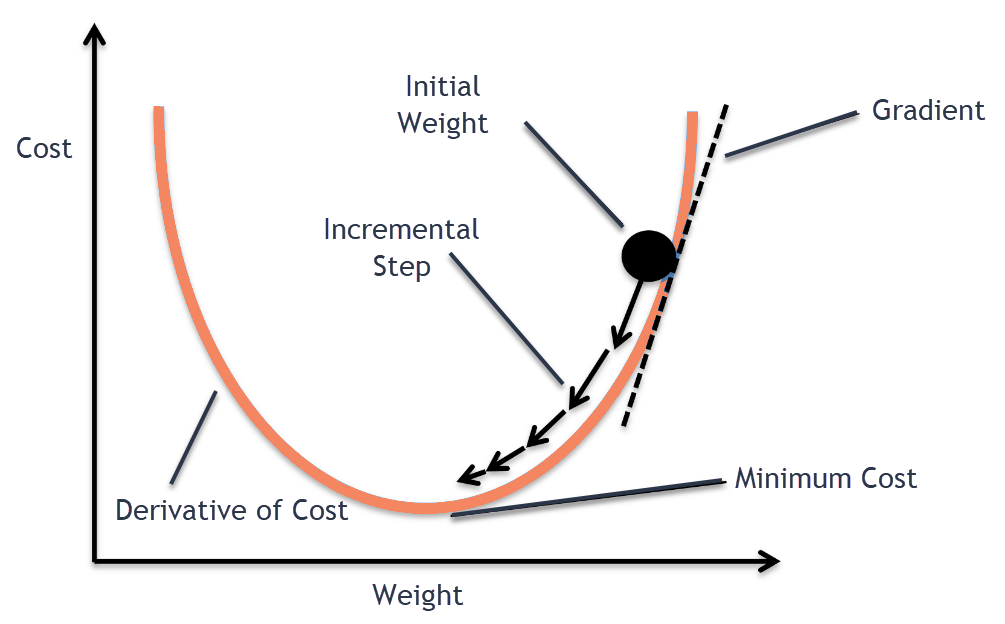

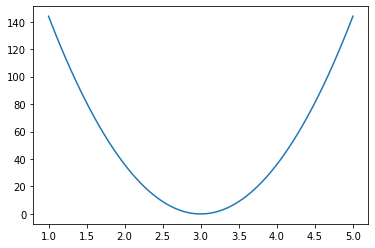

In [6]:
import matplotlib.pyplot as plt
y=18
x=6
mse= lambda b: (y-x*b)**2
b= np.linspace(1,5,100)
e= mse(b)
plt.plot(b,e)

In [5]:
type(b)

numpy.ndarray

In [6]:
grad_desc(6,18, lr=0.1, max_iter=10000, normalize= True)

B sayısı=  0.6398030754470817
grad=  -9.788389390141816e-07
iter=  588


2.9999956931086684

In [296]:
grad_desc(6,18, lr=0.1, normalize=True) # normalize edersek çalışır.

B sayısı=  0.8708479229632943
grad=  -9.880271219694e-07
iter=  1


2.9999956526806635

In [297]:
grad_desc(6,18, lr=0.05,  normalize=True) # normalizeden amaç, sayıları kuçülterek, sonuca daha kolay ulaşmak

B sayısı=  0.4045700929538003
grad=  -9.913419198130193e-07
iter=  1


2.9999955885284573

In [7]:
X= np.random.normal(5,1,(900))

In [8]:
X.reshape(-1,1).shape

(900, 1)

In [9]:
e= np.random.randn(900)
b= -12
y= X*b +e

In [307]:
# iki değişken için sonuç bulmak y= ax+bz
def double_desc(x,z,y,tol=10**-6, lr=1,max_iter=10000 , normalize= False):
    if normalize:
        mu= max(x,y,z)
        x= x/mu
        z= z/ mu
        y= y/mu
    iter_=0
    b= random.random()
    a= np.random.randn()
    grad_a= 10
    grad_b=10
    while abs(grad_a) > tol and abs(grad_b) > tol and iter_<max_iter:
        grad_a = 2* (y - x*a)*(-x)
        grad_b = 2 * (y -z*b)* (-z)
        b= b - lr * grad_b
        a= a - lr * grad_a
        iter_ =+1
    print("iter= ", iter_)
    return a,b
        

In [312]:
%%time
double_desc(3,6,12, normalize=True)

iter=  1
Wall time: 1 ms


(3.7269466854149917, 1.999999317718167)

In [9]:
import sklearn

In [15]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()  #model değişkenine atadık
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y.shape

(900,)

In [23]:
model.fit(X.reshape(-1,1),y)  # modeli uydurduk.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.coef_  # coefficiency katsayılar

array([-12.03438648])

In [25]:
model.predict([[5]]) # predict ile verdiğimiz X değeri için fonksiyonun Yyi bulmaısnı bekliyoruz

array([-60.02854853])

In [26]:
model.predict([[0]])  # predict ile verdiğimiz X değeri için fonksiyonun Yyi bulmaısnı bekliyoruz

array([0.14338386])

In [27]:
model.intercept_  

0.1433838591267289

In [28]:
x_yeni = np.random.normal(5,2,20) # 2D array olmalı ki model predict edebilsin 
model.predict(x_yeni.reshape(-1,1))

array([ -19.80426067,  -66.93947934,  -31.75123984,  -81.2152999 ,
        -40.67053394,  -42.97454847,  -46.10437022,  -43.28917009,
        -85.36777519,  -66.72745217,  -43.60108128,   -9.09904501,
        -60.9758265 ,  -79.28057359,  -41.94489418, -103.92372435,
        -44.94560025,  -77.29632038,  -68.88497812,  -41.78347041])

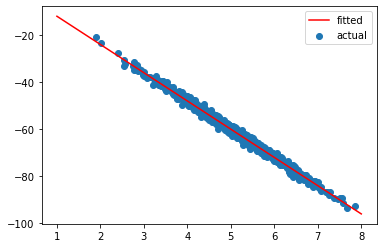

In [32]:
Xi = np.linspace(1,8,900)   # simple linear regression
yi = model.predict(Xi.reshape(-1,1))
plt.scatter(X,y,label= "actual")
plt.plot(Xi,yi,"r", label= "fitted")
plt.legend()

In [33]:
model.score(X.reshape(-1,1),y)  # burada model.score kullanarak, verilen değerler ve gerçek değerlerin 
# arasındaki ilişki skorunu bulduk. max değer 1, 1'e eşit olması durumu ideal durumdur.

0.9920975288371594

                                                        ###  $ R^2$ skoru 


$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

$$SS_{res} = \sum{(y - \hat{y})^2}$$

$$SS_{tot} = \sum{(y - \bar{y})^2}$$

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
# r^2 amacı farklı modellerin hatasını ölçmek, kıyaslamak. Veya bizim modelimizin performans ölçümünü yapmaktır

In [36]:
# r^2 fonksiyonun kendimiz yazmayı deniyoruz
def r2(y_gerçek,y_tahmin):
    ss_res= ((y_gerçek - y_tahmin)**2).sum()
    ss_tot= ((y_gerçek - y_gerçek.mean())**2).sum()
    r2_ = 1- (ss_res / ss_tot)
    return r2_

In [37]:
r2(y, model.predict(X.reshape(-1,1)))  # yazdığımız fonk çalıştırdık.

0.9920975288371595

In [38]:
r2_score(y, model.predict(X.reshape(-1,1)))

0.9920975288371595

In [402]:
y_yeni= np.ones_like(y)*y.mean()
y_yeni[:10]

array([10.33027459, 10.33027459, 10.33027459, 10.33027459, 10.33027459,
       10.33027459, 10.33027459, 10.33027459, 10.33027459, 10.33027459])

In [403]:
print(r2_score(y,y_yeni))  # r^2 = 1 olması idealdir. 1'e yakın değer bulmak bizim için iyiidr
print(mean_squared_error(y, y_yeni)) # ortalama hata*kare  veriyor.    (ss_res/ y.shape[0]) formulü budur

0.0
17.9777245198509


In [404]:
print(r2_score(y,y))  # 1 olmaıs ideal duurmdur
print(mean_squared_error(y,y))  # 0 olması ideal durumdur

1.0
0.0


In [405]:
y_yeni2= np.random.randn(y.shape[0])
y_yeni2[:20]

array([-0.09498502, -0.07496748,  0.21401597, -0.6839195 ,  1.54252986,
       -0.96707079,  0.47735252,  0.21074809, -0.29225524, -1.03408154,
       -2.67717233, -0.00997583, -1.26146377, -0.73859888,  0.76591372,
       -0.79452203, -1.14788748,  1.03327538,  1.25326664,  0.48568618])

In [103]:
print(r2_score(y,y_yeni2))
print(mean_squared_error(y, y_yeni2))

-25.34809933124037
3789.739536903454


In [16]:
xx= np.random.randn(800,5)  # multiple linear regression
bb= np.array([2,0,7,-5,6]).reshape(5,1)
hata= np.random.randn(800,1)*3
intercept= 21
yy= xx@bb + hata + intercept
model2= LinearRegression()

In [44]:
model2.fit(xx,yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model2.coef_

array([[ 1.94329312, -0.01055305,  7.03074931, -5.02664842,  5.96448955]])

In [46]:
model2.intercept_

array([21.03308801])

In [47]:
model2.predict([[4,12,6,0,8]])  # x değerini girerek yyi bulmaya çalıştık

array([[118.58003618]])

In [48]:
model2.score(xx,yy)

0.9282878343205613

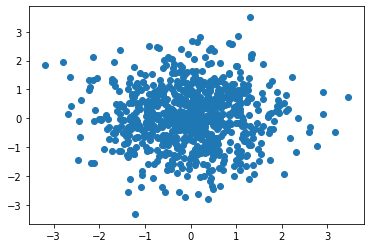

In [49]:
plt.scatter(xx[:,3],xx[:,2])  # ideal durumdur. bunun olması bizim örneklemlerimizin iyi olduğunu gösterir.

In [438]:
n=800
xx= np.random.randn(n,5)  # multiple linear regression
xx[:,2]=xx[:,3]  # iki satırı birbiirne eşitledik
bb= np.array([2,0,7,-5,6]).reshape(5,1)
hata= np.random.randn(n,1)*3
intercept= 21
yy= xx@bb + hata + intercept
model2= LinearRegression()  # burada iki satırı birbirine eşitledik

In [439]:
model2.fit(xx[:,[0,1,2,4]],yy)   # model2yi fit ettik, aynı olan satırı çıkardık

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [440]:
model2.coef_

array([[ 2.07890621, -0.09769449,  1.97049338,  5.99874995]])

In [441]:
model2.intercept_

array([20.90597371])

In [442]:
model2.predict([[4,6,9,8]])  # x değerini girerek yyi bulmaya çalıştık. predict düştü

array([[94.35987167]])

In [444]:
model2.score(xx[:,[0,1,2,4]],yy)

0.813493745551963

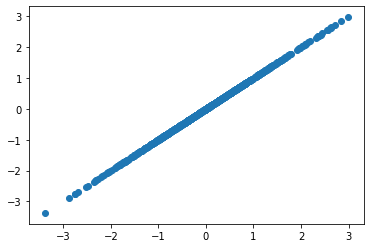

In [269]:
plt.scatter(xx[:,3],xx[:,2]) # aynı olan satırların predict grafiği. olabilecek en kötü durum
# bu durumda aynı olan satırlardan birini örneklemden çıkartırız.

In [31]:
n=80
xx= np.random.randn(n,5)  # multiple linear regression
xx[:,2]=xx[:,3]  # iki satırı birbiirne eşitledik
bb= np.array([2,0,7,-5,6]).reshape(5,1)
hata= np.random.randn(n,1)*3
intercept= 21
yy= xx@bb + hata + intercept
model2= LinearRegression()  # burada iki satırı birbirine eşitledik

In [451]:
model2.fit(xx[:,[0,1,2,3,4]],yy)   # model2yi fit ettik, tüm sütunları aldık
                                   # burada corelasyon modeli saptırdı. onu görüyoruz

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [452]:
model2.coef_

array([[1.58328766, 0.66573468, 0.84603734, 0.84603734, 6.07782529]])

In [448]:
model2.intercept_

array([20.95592863])

In [449]:
model2.score(xx.reshape(-1,5),yy)

0.8234349592891314

In [249]:
model2.predict([[4,6,0,9,8]])  # x değerini girerek yyi bulmaya çalıştık. predict düştü

array([[86.35304591]])

In [343]:
aaa=np.array([4,-6,2,1,-8]).reshape(1,-1)
aaa@bb + intercept

array([[-505]])

In [262]:
model2.predict(aaa)  # x değerini girerek yyi bulmaya çalıştık. predict düştü

array([[-14.2300806]])

In [351]:
model2.score(xx[:,[0,1,2,4]],yy)  # score'u bulduk. iki satır aynı olduğu için score düşük

0.6859369440559371

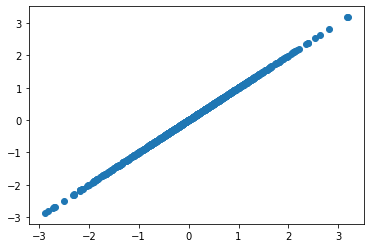

In [195]:
plt.scatter(xx[:,3],xx[:,2]) # aynı olan satırların predict grafiği. olabilecek en kötü durum
# bu durumda aynı olan satırlardan birini örneklemden çıkartırız.

In [453]:
np.correlate(xx[:,3] , xx[:,2])

array([98.12378257])

In [29]:
import seaborn
import pandas as pd

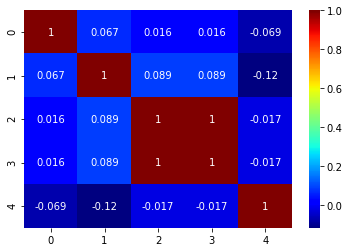

In [32]:
seaborn.heatmap(pd.DataFrame(xx).corr(), cmap="jet", annot= True)  # burada aynı olan sutunları anlamaya çalıştık.
                                                                # seaborn.heatmap(pd.DataFrame(xx).corr() kısmı yeterli

In [211]:
big_data = pd.DataFrame(np.random.randn(90000, 5), columns=list('abcde'))  # şükrü chatten gönderdi
bb = np.array([0, 0.2, -0.1, 0, 0.4]).reshape(-1, 1)
ee = np.random.randn(90000, 1)
interc = 0.6
y = big_data.values @ bb + ee + interc
big_data["y"] = y

In [216]:
errors = []                  # burada hatanın örneklem ile ilişkisini bulmaya çalıştık. 
model = LinearRegression()   # örneklem büyüdükçe hata azaldı.
for i in range(1,5000, 100):
    sample = big_data.sample(i, replace=False)
    Xx = sample[list('abcde')].values
    Yy = sample['y'].values
    model.fit(Xx, Yy)
    errors.append(mean_squared_error(y, model.predict(big_data.drop('y', 1).values)))
print(errors)

[2.5754911651023655, 1.0244099101703672, 1.0480278334444206, 1.0191012697713473, 1.025094466193004, 1.0139505397047184, 1.0038855348923152, 1.0023387660276792, 1.011611474572682, 0.9999453637011335, 1.002321641306758, 1.0055693428961665, 1.0037339365053213, 1.0001515714711011, 0.9987996359993273, 1.0001317137360093, 1.0005845803425213, 1.0037036319239943, 1.0031719096921903, 1.0007653741061509, 0.9994595514628787, 0.99920150272378, 1.0001048782936357, 0.999582412605339, 1.0017252888393264, 0.9998400644981503, 0.9980879857016338, 0.9994831019227148, 0.9995288908912362, 0.9983165541468212, 0.9997935464991536, 0.9992745599873083, 0.9986153075806067, 1.0000251063428152, 0.9989666373966988, 1.000845931241177, 0.9981184657905237, 0.9986301567692996, 0.9992877104166153, 0.9992355277273135, 0.9982663887572473, 0.9978937231373839, 0.9993233479523427, 0.9986634791970014, 0.9980516437200447, 0.9981089255147704, 0.9976042868293318, 0.9990227595271123, 0.9988123221063023, 0.9979124948292345]


In [ ]:
mean_squared_error()

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
big_data = pd.DataFrame(np.random.randn(90000, 5), columns=list('abcde'))
bb = np.array([0, 2, -1, 0, 4]).reshape(-1, 1)
ee = np.random.randn(90000, 1)
interc = 3.6
y = big_data.values @ bb + ee + interc
big_data['y'] = y
model.coef_
model.intercept_
trerrors = []
tserrors = []
trscores = []
tsscores = []
model = LinearRegression()
ren = range(500, 800, 5)
for i in ren:
    sample = big_data.sample(i, replace=False)
    Xx = sample[list('abcde')].values
    Yy = sample['y'].values
    model.fit(Xx, Yy)
    yt = model.predict(Xx)
    yp = model.predict(big_data.drop('y', 1).values)
    tserrors.append(mean_squared_error(y, yp))
    trerrors.append(mean_squared_error(Yy, yt))
    tsscores.append(r2_score(y, yp))
    trscores.append(r2_score(Yy, yt))

Text(0.5, 1.0, 'Error vs Sample Size')

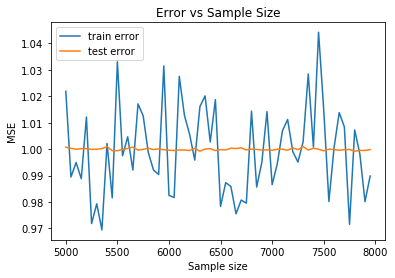

In [224]:
plt.plot(ren, trerrors, label='train error')
plt.plot(ren, tserrors, label='test error')
plt.legend()
plt.xlabel('Sample size')
plt.ylabel('MSE')
plt.title('Error vs Sample Size')

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
big_data = pd.DataFrame(np.random.randn(90000, 5), columns=list('abcde'))
bb = np.array([0, 2, -1, 0, 4]).reshape(-1, 1)
ee = np.random.randn(90000, 1)
interc = 3.6
y = big_data.values @ bb + ee + interc
big_data['y'] = y
model.coef_
model.intercept_
trxerrors = []
tsxerrors = []
tserrors = []
trscores = []
tsscores = []
model = LinearRegression()
ren = range(20, 500, 5)
for i in ren:
    sample = big_data.sample(i, replace=False)
    Xx = sample[list('be')].values
    Yy = sample['y'].values
    XX_train, XX_test, YY_train, YY_test = train_test_split(Xx, Yy, test_size=0.2)
    model.fit(XX_train, YY_train)
    ytr = model.predict(XX_train)
    yte = model.predict(XX_test)
    yp = model.predict(big_data.drop('y', 1)[["b","e"]].values)
    tserrors.append(mean_squared_error(y, yp))
    trxerrors.append(mean_squared_error(YY_train, ytr))
    tsxerrors.append(mean_squared_error(YY_test, yte))
#     tsscores.append(r2_score(y, yp))
#     trscores.append(r2_score(Yy, yt))

Text(0.5, 1.0, 'Error vs Sample Size')

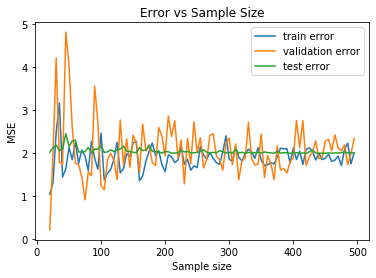

In [234]:
plt.plot(ren, trxerrors, label='train error')
plt.plot(ren, tsxerrors, label='validation error')
plt.plot(ren, tserrors, label='test error')
plt.legend()
plt.xlabel('Sample size')
plt.ylabel('MSE')
plt.title('Error vs Sample Size')

In [229]:
big_data.corr()

,a,b,c,d,e,y
a,1.000000,-0.003102,-0.003336,0.003675,0.002867,0.002657
b,-0.003102,1.000000,-0.001301,-0.002812,0.001157,0.427918
c,-0.003336,-0.001301,1.000000,-0.003268,0.000213,-0.213275
d,0.003675,-0.002812,-0.003268,1.000000,-0.003462,-0.004907
e,0.002867,0.001157,0.000213,-0.003462,1.000000,0.852570
y,0.002657,0.427918,-0.213275,-0.004907,0.852570,1.000000


In [48]:
import pandas as pd

In [53]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D0AC-2CA9

 Directory of C:\Users\windows\Desktop\python\intro-to-python

19.02.2020  11:57    <DIR>          .
19.02.2020  11:57    <DIR>          ..
10.01.2020  09:52                15 .gitignore
19.02.2020  09:43    <DIR>          .ipynb_checkpoints
23.01.2020  10:29    <DIR>          __pycache__
17.01.2020  12:15            11.685 17.01.2020 notlar�.ipynb
16.02.2020  03:00             2.534 abc.csv
31.01.2020  08:50                46 agirliklar.csv
23.01.2020  10:46               141 argumanlar.py
23.01.2020  10:47                22 biryaz�.txt
14.02.2020  20:32               102 city.csv
28.01.2020  00:51            68.789 Class calismalari 23.01.2020.ipynb
17.02.2020  12:51            13.475 Classlar.ipynb
24.01.2020  02:48    <DIR>          course
14.02.2020  20:32             2.673 customer.csv
06.02.2020  10:03         7.810.254 demand_pdf.csv
23.01.2020  11:01               273 dosyadanokuma.py
06.02.2020  10:10       

In [62]:
df= pd.read_csv("havalimanıDF.csv")
df.iloc[2:5]

,Unnamed: 0,sehir,yıl,yolcu_dıshat,yolcu_ichat,ucak_ichat,ucak_dıshat,toplam_yolcu,toplam_ucak
2,2,Mugla,2003,101786.278935,209318.566591,657.894737,468.421053,311104.845527,1126.315789
3,3,İstanbul,2004,99400.748326,198439.187240,736.842105,452.631579,297839.935566,1189.473684
4,4,Orgy,2005,100548.091530,201723.260148,815.789474,436.842105,302271.351678,1252.631579


In [69]:
df.groupby("sehir")["yolcu_dıshat","yolcu_ichat"].mean()

c:\users\windows\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,yolcu_dıshat,yolcu_ichat
sehir,,
Ankara,100448.538467,211566.166088
Hatay,100736.584794,204036.007996
Mugla,100943.024286,205552.167151
Orgy,100379.080568,195325.834310
İstanbul,99665.671512,195896.727351
İzmir,99533.882656,195447.529559


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/4.regresyon/ml_4a_lineer_regresyon/data/housing.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
